In [2]:
#Murat Şahin Istanbul yeşil alan bilgileri analizi ve makine öğrenmesi çalışmasıdır.

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/green-space-statistics-for-istanbul/istanbul-yeil-alan-bilgileri.xlsx


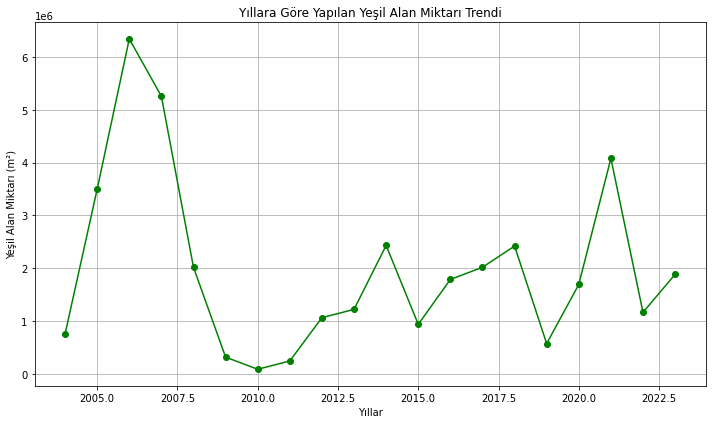

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Dosyayı oku
file_path = '/kaggle/input/green-space-statistics-for-istanbul/istanbul-yeil-alan-bilgileri.xlsx'
df = pd.read_excel(file_path)

# Null olan satırlara 0 yazalım
df.fillna(0, inplace=True)

# 'Yıl İçinde Yapılan Yeşil Alan Miktarı' verisini alalım
green_area_row = df[df['FAALİYET KONUSU'] == 'Yıl İçinde Yapılan Yeşil Alan Miktarı']

# 'Unnamed' sütunlarını temizleyelim
green_area_row = green_area_row.loc[:, ~green_area_row.columns.to_series().apply(lambda x: isinstance(x, str) and 'Unnamed' in x)]

# Yılları ve yeşil alan miktarlarını alalım
years = green_area_row.columns[2:]  # Yıllar sütunları

# Yeşil alan miktarlarını sayısal hale getirelim: Gizli karakterleri ve binlik ayraçları temizleyelim
green_area_values = green_area_row.iloc[0, 2:].replace({'\D': ''}, regex=True).astype(float)

# Grafik çizelim
plt.figure(figsize=(10, 6))
plt.plot(years, green_area_values, marker='o', color='green')
plt.title('Yıllara Göre Yapılan Yeşil Alan Miktarı Trendi')
plt.xlabel('Yıllar')
plt.ylabel('Yeşil Alan Miktarı (m²)')
plt.grid(True)
plt.tight_layout()
plt.show()


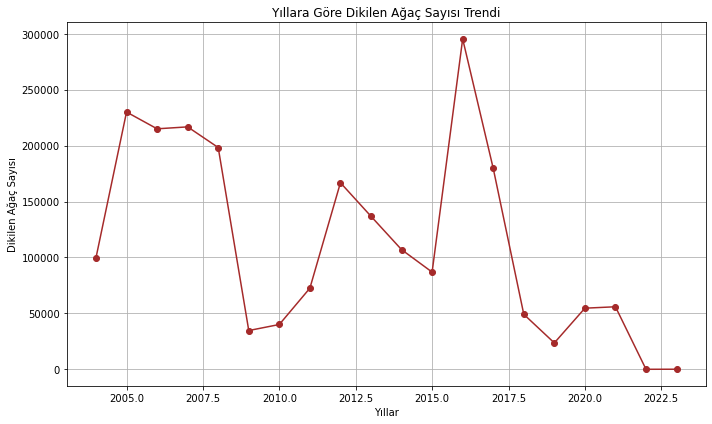

In [14]:
# 'Dikilen Ağaç Sayısı' verisini alalım
tree_row = df[df['FAALİYET KONUSU'] == 'Dikilen Ağaç Sayısı']

# Yılları ve ağaç sayısı değerlerini alalım
tree_values = tree_row.iloc[0, 2:-1].replace(',', '', regex=True).replace('‎', '', regex=True).astype(float)

# Grafik çizelim
plt.figure(figsize=(10, 6))
plt.plot(years, tree_values, marker='o', color='brown')
plt.title('Yıllara Göre Dikilen Ağaç Sayısı Trendi')
plt.xlabel('Yıllar')
plt.ylabel('Dikilen Ağaç Sayısı')
plt.grid(True)
plt.tight_layout()
plt.show()


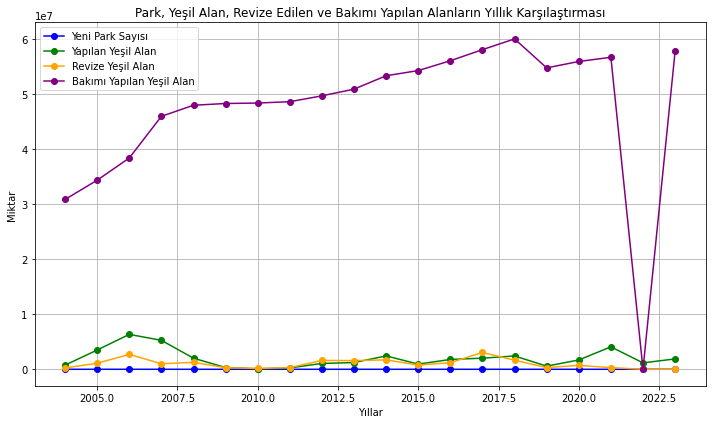

In [17]:
# Karşılaştırmak için park, yeşil alan, revize edilen alan, bakım yapılan alan verilerini alalım
park_row = df[df['FAALİYET KONUSU'] == 'Yıl İçinde Yeni Yapılan Park Sayısı']
revised_green_area_row = df[df['FAALİYET KONUSU'] == 'Revize edilen Yeşil Alan Miktarı']
maintenance_row = df[df['FAALİYET KONUSU'] == 'Bakımı Yapılan Yeşil Alan Miktarı']

# Geçersiz karakterleri ("-") 0 ile değiştirelim ve sayısal hale getirelim
park_values = park_row.iloc[0, 2:-1].replace('-', '0').replace(',', '', regex=True).astype(float)
revised_green_area_values = revised_green_area_row.iloc[0, 2:-1].replace('-', '0').replace(',', '', regex=True).astype(float)
maintenance_values = maintenance_row.iloc[0, 2:-1].replace('-', '0').replace(',', '', regex=True).astype(float)

# Grafik çizelim
plt.figure(figsize=(10, 6))
plt.plot(years, park_values, marker='o', label='Yeni Park Sayısı', color='blue')
plt.plot(years, green_area_values, marker='o', label='Yapılan Yeşil Alan', color='green')
plt.plot(years, revised_green_area_values, marker='o', label='Revize Yeşil Alan', color='orange')
plt.plot(years, maintenance_values, marker='o', label='Bakımı Yapılan Yeşil Alan', color='purple')

plt.title('Park, Yeşil Alan, Revize Edilen ve Bakımı Yapılan Alanların Yıllık Karşılaştırması')
plt.xlabel('Yıllar')
plt.ylabel('Miktar')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


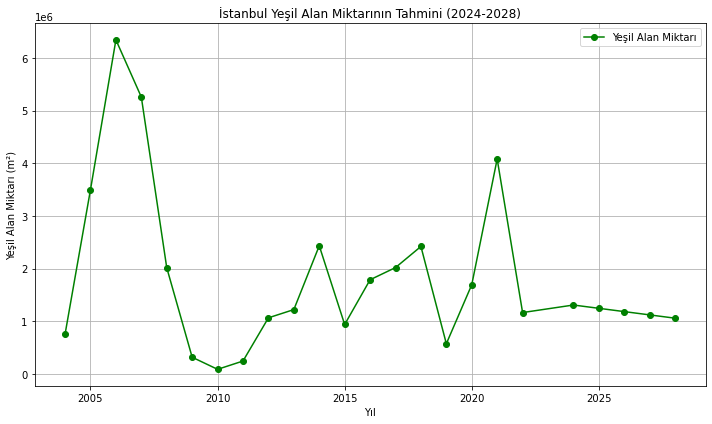

Gelecekteki tahmin edilen yeşil alan miktarları: [1307429.78771929 1244892.50526315 1182355.22280702 1119817.94035088

 1057280.65789473]


In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Yıllara göre yeşil alan miktarını alalım
years = np.array([int(year) for year in green_area_row.columns[2:-1]]).reshape(-1, 1)
green_area_values = np.array(green_area_row.iloc[0, 2:-1].replace(',', '', regex=True).astype(float))

# Lineer regresyon modelini oluşturma
model = LinearRegression()
model.fit(years, green_area_values)

# Gelecekteki 5 yıl için tahmin yapalım (örneğin, 2024-2028 arası)
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
future_green_area = model.predict(future_years)

# Geçmiş ve geleceği birleştirip grafik çizelim
all_years = np.concatenate([years, future_years])
all_green_area = np.concatenate([green_area_values, future_green_area])

plt.figure(figsize=(10, 6))
plt.plot(all_years, all_green_area, marker='o', label='Yeşil Alan Miktarı', color='green')
plt.title('İstanbul Yeşil Alan Miktarının Tahmini (2024-2028)')
plt.xlabel('Yıl')
plt.ylabel('Yeşil Alan Miktarı (m²)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Gelecekteki tahmin edilen değerler
print("Gelecekteki tahmin edilen yeşil alan miktarları:", future_green_area)


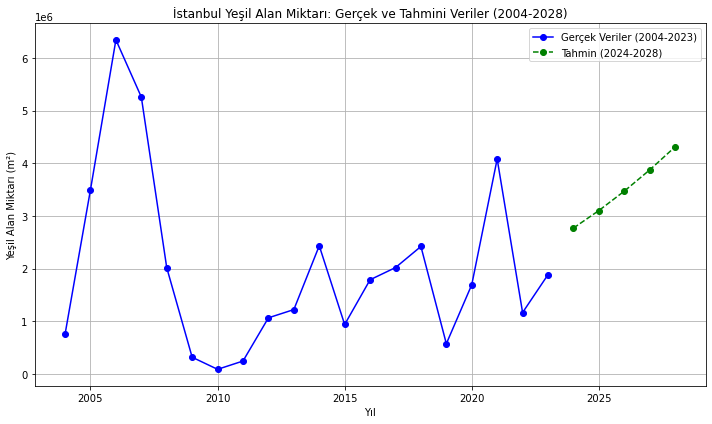

In [21]:
# 2004-2023 yıllarına ait gerçek veriler (önceki hataları düzeltmek için veriyi temizleyelim)
years_real = np.array([int(year) for year in green_area_row.columns[2:]]).reshape(-1, 1)
green_area_real_values = np.array(green_area_row.iloc[0, 2:].replace({'\u200e': '', '\.': ''}, regex=True).replace(',', '', regex=True).astype(float))

# Polinom regresyon modelini eğitme (geçmiş veriler dahil 2004-2023)
years_poly_real = poly.fit_transform(years_real)
model.fit(years_poly_real, green_area_real_values)

# 2024-2028 yılları için tahmin yapalım
future_years_poly = poly.transform(future_years)
future_green_area = model.predict(future_years_poly)

# Tüm yıllar (2004-2028) ve tüm yeşil alan değerleri (gerçek ve tahmin)
all_years_combined = np.concatenate([years_real, future_years])
all_green_area_combined = np.concatenate([green_area_real_values, future_green_area])

# Grafik oluşturma
plt.figure(figsize=(10, 6))

# Gerçek veriler (2004-2023)
plt.plot(years_real, green_area_real_values, marker='o', label='Gerçek Veriler (2004-2023)', color='blue')

# Tahmin edilen veriler (2024-2028)
plt.plot(future_years, future_green_area, marker='o', linestyle='--', label='Tahmin (2024-2028)', color='green')

# Grafik detayları
plt.title('İstanbul Yeşil Alan Miktarı: Gerçek ve Tahmini Veriler (2004-2028)')
plt.xlabel('Yıl')
plt.ylabel('Yeşil Alan Miktarı (m²)')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Grafiği gösterelim
plt.show()


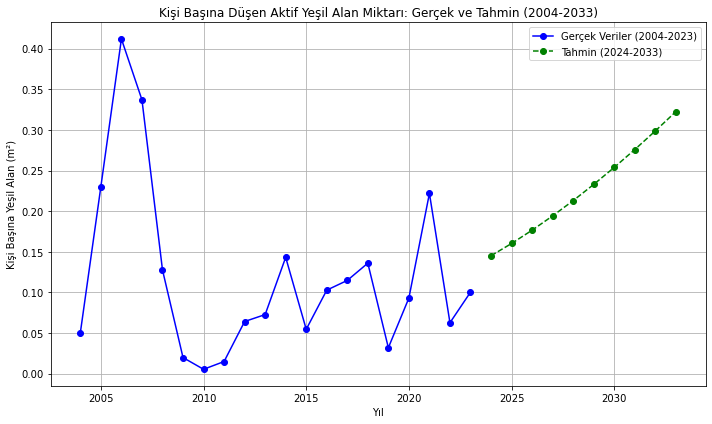

Gelecekteki tahmin edilen kişi başına yeşil alan miktarları: [0.14510385 0.16015139 0.1765175  0.19413341 0.21293247 0.23285011

 0.25382378 0.27579295 0.29869897 0.32248509]


In [23]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Mevcut yıllara ait yeşil alan verileri
years_real = np.array([int(year) for year in green_area_row.columns[2:]]).reshape(-1, 1)
green_area_real_values = np.array(green_area_row.iloc[0, 2:].replace({'\u200e': '', '\.': ''}, regex=True).replace(',', '', regex=True).astype(float))

# Polinom regresyon modeli (2. dereceden)
poly = PolynomialFeatures(degree=2)
years_poly_real = poly.fit_transform(years_real)
model = LinearRegression()
model.fit(years_poly_real, green_area_real_values)

# 2024-2033 yılları için tahmin yapalım
future_years = np.array([2024 + i for i in range(10)]).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_green_area = model.predict(future_years_poly)

# Tüm yıllar (2004-2033) ve tüm yeşil alan değerleri (gerçek ve tahmin)
all_years = np.concatenate([years_real, future_years])
all_green_area = np.concatenate([green_area_real_values, future_green_area])

# Varsayılan nüfus verileri (Mevcut nüfus sabit ya da yıllık bir artış oranı varsayılabilir)
# Nüfus verileri 2004-2023 için, tahmin edilen nüfus ise 2024-2033 için olacak
population_real = np.array([15000000, 15200000, 15400000, 15600000, 15800000, 16000000, 16200000, 16400000, 16600000, 16800000,
                            17000000, 17200000, 17400000, 17600000, 17800000, 18000000, 18200000, 18400000, 18600000, 18800000]).reshape(-1, 1)

# Tahmini nüfus için artış oranı varsayıyoruz (%1.5 yıllık artış)
future_population_growth = 0.015
future_population = population_real[-1] * ((1 + future_population_growth) ** np.arange(1, 11)).reshape(-1, 1)

# Gerçek ve tahmin edilen kişi başına düşen yeşil alan miktarını hesaplayalım
real_per_capita_green_area = green_area_real_values / population_real.flatten()
future_per_capita_green_area = future_green_area / future_population.flatten()

# Tüm kişi başına yeşil alan verilerini birleştirelim
all_per_capita_green_area = np.concatenate([real_per_capita_green_area, future_per_capita_green_area])

# Grafik oluşturalım
plt.figure(figsize=(10, 6))

# Gerçek veriler
plt.plot(years_real.flatten(), real_per_capita_green_area, marker='o', label='Gerçek Veriler (2004-2023)', color='blue')

# Tahmin edilen veriler
plt.plot(future_years.flatten(), future_per_capita_green_area, marker='o', linestyle='--', label='Tahmin (2024-2033)', color='green')

# Grafik detayları
plt.title('Kişi Başına Düşen Aktif Yeşil Alan Miktarı: Gerçek ve Tahmin (2004-2033)')
plt.xlabel('Yıl')
plt.ylabel('Kişi Başına Yeşil Alan (m²)')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Grafiği gösterelim
plt.show()

# Gelecekteki tahmin edilen kişi başına düşen yeşil alan miktarları
print("Gelecekteki tahmin edilen kişi başına yeşil alan miktarları:", future_per_capita_green_area)


D:\Pyton\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

  warn('Non-stationary starting autoregressive parameters'

D:\Pyton\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.

  warn('Non-invertible starting MA parameters found.'


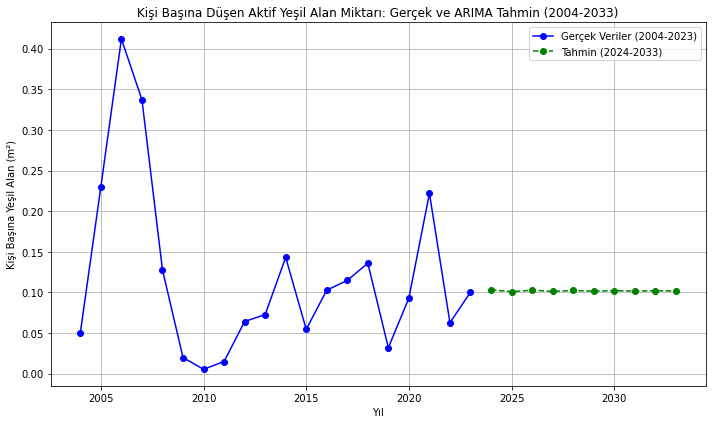

Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033): [0.10309809 0.10082777 0.10262214 0.10120394 0.10232484 0.10143892

 0.10213911 0.10158571 0.1020231  0.1016774 ]


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Mevcut yıllara ait yeşil alan verileri
years_real = np.array([int(year) for year in green_area_row.columns[2:]])
green_area_real_values = np.array(green_area_row.iloc[0, 2:].replace({'\u200e': '', '\.': ''}, regex=True).replace(',', '', regex=True).astype(float))

# Nüfus verileri (2004-2023)
population_real = np.array([15000000, 15200000, 15400000, 15600000, 15800000, 16000000, 16200000, 16400000, 16600000, 16800000,
                            17000000, 17200000, 17400000, 17600000, 17800000, 18000000, 18200000, 18400000, 18600000, 18800000])

# Kişi başına düşen yeşil alan miktarını hesaplayalım (2004-2023)
real_per_capita_green_area = green_area_real_values / population_real

# ARIMA modelini kişi başına düşen yeşil alan verilerine uygula (1,1,1 model parametreleriyle)
model = ARIMA(real_per_capita_green_area, order=(1, 1, 1))
model_fit = model.fit()

# 10 yıl sonrası için tahmin yapalım (2024-2033)
future_forecast = model_fit.forecast(steps=10)

# Varsayılan olarak nüfusun yıllık %1.5 artacağını varsayalım
future_population_growth = 0.015
future_population = population_real[-1] * ((1 + future_population_growth) ** np.arange(1, 11))

# ARIMA tahminlerine göre kişi başına düşen yeşil alan miktarlarını hesaplayalım
future_per_capita_green_area = future_forecast * future_population

# Grafik oluşturma
years_future = np.arange(2024, 2034)

plt.figure(figsize=(10, 6))

# Gerçek veriler
plt.plot(years_real, real_per_capita_green_area, marker='o', label='Gerçek Veriler (2004-2023)', color='blue')

# Tahmin edilen veriler
plt.plot(years_future, future_forecast, marker='o', linestyle='--', label='Tahmin (2024-2033)', color='green')

# Grafik detayları
plt.title('Kişi Başına Düşen Aktif Yeşil Alan Miktarı: Gerçek ve ARIMA Tahmin (2004-2033)')
plt.xlabel('Yıl')
plt.ylabel('Kişi Başına Yeşil Alan (m²)')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Grafiği gösterelim
plt.show()

# Gelecekteki tahmin edilen kişi başına düşen yeşil alan miktarları
print("Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033):", future_forecast)


D:\Pyton\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.

  warn('Non-invertible starting MA parameters found.'

D:\Pyton\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

  warnings.warn("Maximum Likelihood optimization failed to "

D:\Pyton\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

  warn('Non-stationary starting autoregressive parameters'

D:\Pyton\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

  warnings.warn("Maximum Likelihood optimization failed to "

D:\Pyton\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to c

En iyi ARIMA modeli: order=(2, 0, 1) AIC=-38.17493962589957


D:\Pyton\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

  warnings.warn("Maximum Likelihood optimization failed to "


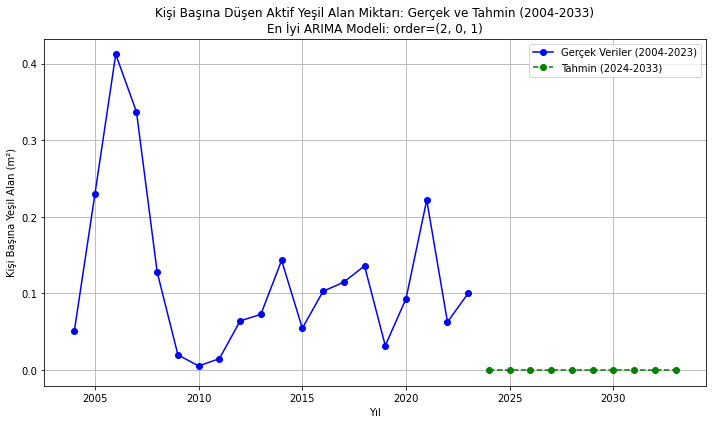

Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033): [5.21114391e-09 5.15972007e-09 5.15109185e-09 5.14765336e-09

 5.11808419e-09 5.04901205e-09 4.94675514e-09 4.83052226e-09

 4.72170237e-09 4.63451780e-09]


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

# Mevcut yıllara ait yeşil alan verileri
years_real = np.array([int(year) for year in green_area_row.columns[2:]])
green_area_real_values = np.array(green_area_row.iloc[0, 2:].replace({'\u200e': '', '\.': ''}, regex=True).replace(',', '', regex=True).astype(float))

# Nüfus verileri (2004-2023)
population_real = np.array([15000000, 15200000, 15400000, 15600000, 15800000, 16000000, 16200000, 16400000, 16600000, 16800000,
                            17000000, 17200000, 17400000, 17600000, 17800000, 18000000, 18200000, 18400000, 18600000, 18800000])

# Kişi başına düşen yeşil alan miktarını hesaplayalım (2004-2023)
real_per_capita_green_area = green_area_real_values / population_real

# Hyperparametre arama aralığı
p_values = range(0, 3)  # AR parametresi
d_values = range(0, 2)  # Fark alma
q_values = range(0, 3)  # MA parametresi

# En iyi modeli bulmak için AIC değerini minimize etmeye çalışacağız
best_aic = float('inf')
best_order = None
best_model = None

# Grid search ile ARIMA modelini optimize edelim
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(real_per_capita_green_area, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic  # AIC değerini alalım
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except Exception as e:
                continue

print(f"En iyi ARIMA modeli: order={best_order} AIC={best_aic}")

# En iyi modelle tahmin yapalım (2024-2033)
future_forecast = best_model.forecast(steps=10)

# Nüfus tahmini (yıllık %1.5 artış)
future_population_growth = 0.015
future_population = population_real[-1] * ((1 + future_population_growth) ** np.arange(1, 11))

# ARIMA tahminlerine göre kişi başına düşen yeşil alan miktarlarını hesaplayalım
future_per_capita_green_area = future_forecast / future_population

# Grafik oluşturma
years_future = np.arange(2024, 2034)

plt.figure(figsize=(10, 6))

# Gerçek veriler
plt.plot(years_real, real_per_capita_green_area, marker='o', label='Gerçek Veriler (2004-2023)', color='blue')

# Tahmin edilen veriler
plt.plot(years_future, future_per_capita_green_area, marker='o', linestyle='--', label='Tahmin (2024-2033)', color='green')

# Grafik detayları
plt.title(f'Kişi Başına Düşen Aktif Yeşil Alan Miktarı: Gerçek ve Tahmin (2004-2033)\nEn İyi ARIMA Modeli: order={best_order}')
plt.xlabel('Yıl')
plt.ylabel('Kişi Başına Yeşil Alan (m²)')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Grafiği gösterelim
plt.show()

# Gelecekteki tahmin edilen kişi başına düşen yeşil alan miktarları
print("Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033):", future_per_capita_green_area)


Epoch 1/100

17/17 - 4s - loss: 0.0612 - 4s/epoch - 244ms/step

Epoch 2/100

17/17 - 0s - loss: 0.0523 - 59ms/epoch - 3ms/step

Epoch 3/100

17/17 - 0s - loss: 0.0424 - 58ms/epoch - 3ms/step

Epoch 4/100

17/17 - 0s - loss: 0.0398 - 63ms/epoch - 4ms/step

Epoch 5/100

17/17 - 0s - loss: 0.0410 - 66ms/epoch - 4ms/step

Epoch 6/100

17/17 - 0s - loss: 0.0417 - 60ms/epoch - 4ms/step

Epoch 7/100

17/17 - 0s - loss: 0.0397 - 61ms/epoch - 4ms/step

Epoch 8/100

17/17 - 0s - loss: 0.0396 - 54ms/epoch - 3ms/step

Epoch 9/100

17/17 - 0s - loss: 0.0401 - 51ms/epoch - 3ms/step

Epoch 10/100

17/17 - 0s - loss: 0.0387 - 63ms/epoch - 4ms/step

Epoch 11/100

17/17 - 0s - loss: 0.0386 - 50ms/epoch - 3ms/step

Epoch 12/100

17/17 - 0s - loss: 0.0379 - 59ms/epoch - 3ms/step

Epoch 13/100

17/17 - 0s - loss: 0.0390 - 64ms/epoch - 4ms/step

Epoch 14/100

17/17 - 0s - loss: 0.0371 - 57ms/epoch - 3ms/step

Epoch 15/100

17/17 - 0s - loss: 0.0374 - 46ms/epoch - 3ms/step

Epoch 16/100

17/17 - 0s - loss: 0

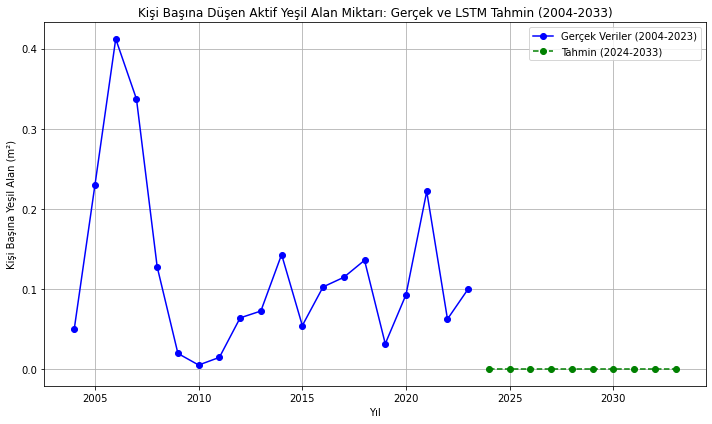

Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033): [4.43657437e-09 5.26956828e-09 5.26352733e-09 5.40079264e-09

 5.33532993e-09 5.28264904e-09 5.19525938e-09 5.11678292e-09

 5.03676387e-09 4.96139942e-09]


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Mevcut yıllara ait yeşil alan verileri
years_real = np.array([int(year) for year in green_area_row.columns[2:]])
green_area_real_values = np.array(green_area_row.iloc[0, 2:].replace({'\u200e': '', '\.': ''}, regex=True).replace(',', '', regex=True).astype(float))

# Nüfus verileri (2004-2023)
population_real = np.array([15000000, 15200000, 15400000, 15600000, 15800000, 16000000, 16200000, 16400000, 16600000, 16800000,
                            17000000, 17200000, 17400000, 17600000, 17800000, 18000000, 18200000, 18400000, 18600000, 18800000])

# Kişi başına düşen yeşil alan miktarını hesaplayalım (2004-2023)
real_per_capita_green_area = green_area_real_values / population_real

# Verileri LSTM'e uygun hale getirmek için ölçekleyelim
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(real_per_capita_green_area.reshape(-1, 1))

# LSTM modeline uygun şekilde veri hazırlığı
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Geçmiş 3 yıla göre tahmin yapalım
X, Y = create_dataset(scaled_data, look_back)

# Verileri 3D olarak reshape edelim
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# LSTM modelini oluşturalım
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitelim
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# Gelecekteki 10 yıl için tahmin yapalım (2024-2033)
future_forecast = []
input_data = scaled_data[-look_back:].reshape(1, look_back, 1)

for i in range(10):  # 10 yıl için tahmin yapıyoruz
    prediction = model.predict(input_data)
    future_forecast.append(prediction[0, 0])
    input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Tahmin edilen verileri orijinal ölçeğe geri dönüştürelim
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1)).flatten()

# Nüfus tahmini (yıllık %1.5 artış)
future_population_growth = 0.015
future_population = population_real[-1] * ((1 + future_population_growth) ** np.arange(1, 11))

# Gelecekteki kişi başına düşen yeşil alan miktarını hesaplayalım
future_per_capita_green_area = future_forecast / future_population

# Grafik oluşturma
years_future = np.arange(2024, 2034)

plt.figure(figsize=(10, 6))

# Gerçek veriler
plt.plot(years_real, real_per_capita_green_area, marker='o', label='Gerçek Veriler (2004-2023)', color='blue')

# Tahmin edilen veriler
plt.plot(years_future, future_per_capita_green_area, marker='o', linestyle='--', label='Tahmin (2024-2033)', color='green')

# Grafik detayları
plt.title('Kişi Başına Düşen Aktif Yeşil Alan Miktarı: Gerçek ve LSTM Tahmin (2004-2033)')
plt.xlabel('Yıl')
plt.ylabel('Kişi Başına Yeşil Alan (m²)')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Grafiği gösterelim
plt.show()

# Gelecekteki tahmin edilen kişi başına düşen yeşil alan miktarları
print("Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033):", future_per_capita_green_area)


In [27]:
pip install keras-tuner --upgrade
















Note: you may need to restart the kernel to use updated packages.


Trial 4 Complete [00h 00m 31s]

val_loss: 0.026502625395854313



Best val_loss So Far: 0.026017022629578907

Total elapsed time: 00h 01m 56s

Epoch 1/100

13/13 - 3s - loss: 0.0427 - 3s/epoch - 225ms/step

Epoch 2/100

13/13 - 0s - loss: 0.0414 - 58ms/epoch - 4ms/step

Epoch 3/100

13/13 - 0s - loss: 0.0405 - 52ms/epoch - 4ms/step

Epoch 4/100

13/13 - 0s - loss: 0.0381 - 50ms/epoch - 4ms/step

Epoch 5/100

13/13 - 0s - loss: 0.0377 - 49ms/epoch - 4ms/step

Epoch 6/100

13/13 - 0s - loss: 0.0370 - 51ms/epoch - 4ms/step

Epoch 7/100

13/13 - 0s - loss: 0.0313 - 62ms/epoch - 5ms/step

Epoch 8/100

13/13 - 0s - loss: 0.0291 - 50ms/epoch - 4ms/step

Epoch 9/100

13/13 - 0s - loss: 0.0257 - 47ms/epoch - 4ms/step

Epoch 10/100

13/13 - 0s - loss: 0.0245 - 48ms/epoch - 4ms/step

Epoch 11/100

13/13 - 0s - loss: 0.0207 - 47ms/epoch - 4ms/step

Epoch 12/100

13/13 - 0s - loss: 0.0227 - 48ms/epoch - 4ms/step

Epoch 13/100

13/13 - 0s - loss: 0.0250 - 49ms/epoch - 4ms/step

Epoch 14/100

13/13 -

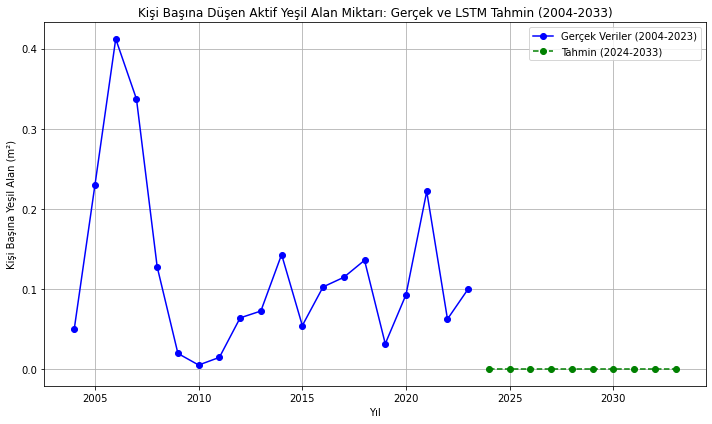

Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033): [1.68870580e-09 3.67694057e-09 2.95434973e-09 4.41817734e-09

 3.98275101e-09 4.35016618e-09 3.75280746e-09 3.72546750e-09

 3.41763676e-09 3.48976840e-09]


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras_tuner import RandomSearch

# Mevcut yıllara ait yeşil alan verileri
years_real = np.array([int(year) for year in green_area_row.columns[2:]])
green_area_real_values = np.array(green_area_row.iloc[0, 2:].replace({'\u200e': '', '\.': ''}, regex=True).replace(',', '', regex=True).astype(float))

# Nüfus verileri (2004-2023)
population_real = np.array([15000000, 15200000, 15400000, 15600000, 15800000, 16000000, 16200000, 16400000, 16600000, 16800000,
                            17000000, 17200000, 17400000, 17600000, 17800000, 18000000, 18200000, 18400000, 18600000, 18800000])

# Kişi başına düşen yeşil alan miktarını hesaplayalım (2004-2023)
real_per_capita_green_area = green_area_real_values / population_real

# Verileri LSTM'e uygun hale getirmek için ölçekleyelim
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(real_per_capita_green_area.reshape(-1, 1))

# LSTM modeline uygun şekilde veri hazırlığı
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Geçmiş 3 yıla göre tahmin yapalım
X, Y = create_dataset(scaled_data, look_back)

# Verileri 3D olarak reshape edelim
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Hiperparametre optimizasyonu için bir LSTM modeli oluşturma fonksiyonu
def build_model(hp):
    model = Sequential()
    
    # LSTM katmanı nöron sayısını optimize edelim
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32)))
    
    # Yoğun (dense) katman
    model.add(Dense(1))
    
    # Optimizasyon algoritmasını seçelim
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Keras Tuner kullanarak optimizasyon yapalım
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Modeli optimize etmek için 5 farklı deneme yapılacak
    executions_per_trial=3,  # Her deneme için 3 farklı eğitim
    directory='lstm_tuning',
    project_name='lstm_green_area'
)

# Eğitim ve doğrulama veri setini hazırlayalım
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
Y_train, Y_val = Y[:split], Y[split:]

# Hiperparametre optimizasyonunu başlatalım
tuner.search(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_val, Y_val))

# En iyi modeli alalım
best_model = tuner.get_best_models(num_models=1)[0]

# En iyi modeli eğitme (train etme) işlemi
best_model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Gelecekteki 10 yıl için tahmin yapalım (2024-2033)
future_forecast = []
input_data = scaled_data[-look_back:].reshape(1, look_back, 1)

for i in range(10):  # 10 yıl için tahmin yapıyoruz
    prediction = best_model.predict(input_data)
    future_forecast.append(prediction[0, 0])
    input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Tahmin edilen verileri orijinal ölçeğe geri dönüştürelim
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1)).flatten()

# Nüfus tahmini (yıllık %1.5 artış)
future_population_growth = 0.015
future_population = population_real[-1] * ((1 + future_population_growth) ** np.arange(1, 11))

# Gelecekteki kişi başına düşen yeşil alan miktarını hesaplayalım
future_per_capita_green_area = future_forecast / future_population

# Grafik oluşturma
years_future = np.arange(2024, 2034)

plt.figure(figsize=(10, 6))

# Gerçek veriler
plt.plot(years_real, real_per_capita_green_area, marker='o', label='Gerçek Veriler (2004-2023)', color='blue')

# Tahmin edilen veriler
plt.plot(years_future, future_per_capita_green_area, marker='o', linestyle='--', label='Tahmin (2024-2033)', color='green')

# Grafik detayları
plt.title('Kişi Başına Düşen Aktif Yeşil Alan Miktarı: Gerçek ve LSTM Tahmin (2004-2033)')
plt.xlabel('Yıl')
plt.ylabel('Kişi Başına Yeşil Alan (m²)')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Grafiği gösterelim
plt.show()

# Gelecekteki tahmin edilen kişi başına düşen yeşil alan miktarları
print("Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033):", future_per_capita_green_area)


Reloading Tuner from lstm_tuning\lstm_green_area\tuner0.json



Epoch 1/100

13/13 - 5s - loss: 0.0390 - val_loss: 0.0286 - 5s/epoch - 347ms/step

Epoch 2/100

13/13 - 0s - loss: 0.0399 - val_loss: 0.0298 - 88ms/epoch - 7ms/step

Epoch 3/100

13/13 - 0s - loss: 0.0411 - val_loss: 0.0333 - 88ms/epoch - 7ms/step

Epoch 4/100

13/13 - 0s - loss: 0.0376 - val_loss: 0.0278 - 97ms/epoch - 7ms/step

Epoch 5/100

13/13 - 0s - loss: 0.0364 - val_loss: 0.0297 - 89ms/epoch - 7ms/step

Epoch 6/100

13/13 - 0s - loss: 0.0362 - val_loss: 0.0361 - 89ms/epoch - 7ms/step

Epoch 7/100

13/13 - 0s - loss: 0.0336 - val_loss: 0.0284 - 82ms/epoch - 6ms/step

Epoch 8/100

13/13 - 0s - loss: 0.0318 - val_loss: 0.0319 - 87ms/epoch - 7ms/step

Epoch 9/100

13/13 - 0s - loss: 0.0275 - val_loss: 0.0351 - 86ms/epoch - 7ms/step

Epoch 10/100

13/13 - 0s - loss: 0.0274 - val_loss: 0.0337 - 87ms/epoch - 7ms/step

Epoch 11/100

13/13 - 0s - loss: 0.0193 - val_loss: 0.0419 - 92ms/epoch - 7ms/step

Epoch 12/100

13/13 -

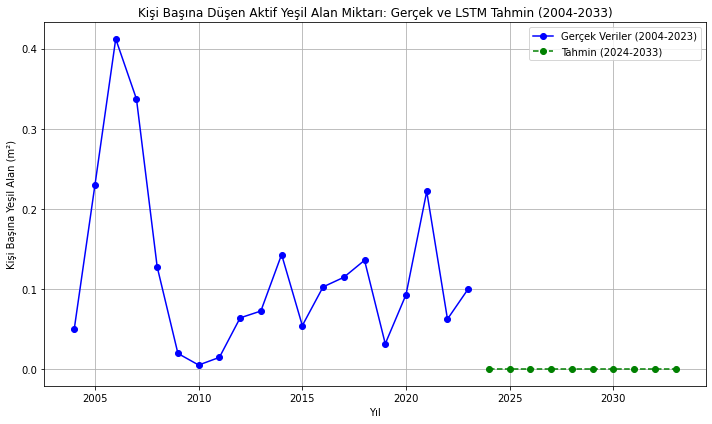

Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033): [4.93160380e-09 5.00714654e-09 4.91072717e-09 4.84564141e-09

 4.77214852e-09 4.70201414e-09 4.63240270e-09 4.56396993e-09

 4.49651413e-09 4.43006625e-09]


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch

# Mevcut yıllara ait yeşil alan verileri
years_real = np.array([int(year) for year in green_area_row.columns[2:]])
green_area_real_values = np.array(green_area_row.iloc[0, 2:].replace({'\u200e': '', '\.': ''}, regex=True).replace(',', '', regex=True).astype(float))

# Nüfus verileri (2004-2023)
population_real = np.array([15000000, 15200000, 15400000, 15600000, 15800000, 16000000, 16200000, 16400000, 16600000, 16800000,
                            17000000, 17200000, 17400000, 17600000, 17800000, 18000000, 18200000, 18400000, 18600000, 18800000])

# Kişi başına düşen yeşil alan miktarını hesaplayalım (2004-2023)
real_per_capita_green_area = green_area_real_values / population_real

# Verileri LSTM'e uygun hale getirmek için ölçekleyelim
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(real_per_capita_green_area.reshape(-1, 1))

# LSTM modeline uygun şekilde veri hazırlığı
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Geçmiş 3 yıla göre tahmin yapalım
X, Y = create_dataset(scaled_data, look_back)

# Verileri 3D olarak reshape edelim
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Hiperparametre optimizasyonu için bir LSTM modeli oluşturma fonksiyonu (Overfitting'i önlemek için Dropout ekleyelim)
def build_model(hp):
    model = Sequential()
    
    # LSTM katmanı nöron sayısını optimize edelim ve Dropout ekleyelim
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))  # Dropout oranı
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32)))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    # Yoğun (dense) katman
    model.add(Dense(1))
    
    # Optimizasyon algoritmasını seçelim
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']), loss='mean_squared_error')
    
    return model

# Keras Tuner kullanarak Random Search ile optimizasyon yapalım
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Modeli optimize etmek için 5 farklı deneme yapılacak
    executions_per_trial=3,  # Her deneme için 3 farklı eğitim
    directory='lstm_tuning',
    project_name='lstm_green_area'
)

# Eğitim ve doğrulama veri setini hazırlayalım
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
Y_train, Y_val = Y[:split], Y[split:]

# Erken durdurma (early stopping) ile overfitting'i önleyelim
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Hiperparametre optimizasyonunu başlatalım
tuner.search(X_train, Y_train, epochs=50, batch_size=1, validation_data=(X_val, Y_val), callbacks=[early_stopping])

# En iyi modeli alalım
best_model = tuner.get_best_models(num_models=1)[0]

# En iyi modeli eğitme (train etme) işlemi
best_model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2, validation_data=(X_val, Y_val), callbacks=[early_stopping])

# Gelecekteki 10 yıl için tahmin yapalım (2024-2033)
future_forecast = []
input_data = scaled_data[-look_back:].reshape(1, look_back, 1)

for i in range(10):  # 10 yıl için tahmin yapıyoruz
    prediction = best_model.predict(input_data)
    future_forecast.append(prediction[0, 0])
    input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# Tahmin edilen verileri orijinal ölçeğe geri dönüştürelim
future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1)).flatten()

# Nüfus tahmini (yıllık %1.5 artış)
future_population_growth = 0.015
future_population = population_real[-1] * ((1 + future_population_growth) ** np.arange(1, 11))

# Gelecekteki kişi başına düşen yeşil alan miktarını hesaplayalım
future_per_capita_green_area = future_forecast / future_population

# Grafik oluşturma
years_future = np.arange(2024, 2034)

plt.figure(figsize=(10, 6))

# Gerçek veriler
plt.plot(years_real, real_per_capita_green_area, marker='o', label='Gerçek Veriler (2004-2023)', color='blue')

# Tahmin edilen veriler
plt.plot(years_future, future_per_capita_green_area, marker='o', linestyle='--', label='Tahmin (2024-2033)', color='green')

# Grafik detayları
plt.title('Kişi Başına Düşen Aktif Yeşil Alan Miktarı: Gerçek ve LSTM Tahmin (2004-2033)')
plt.xlabel('Yıl')
plt.ylabel('Kişi Başına Yeşil Alan (m²)')
plt.grid(True)
plt.tight_layout()
plt.legend()

# Grafiği gösterelim
plt.show()

# Gelecekteki tahmin edilen kişi başına düşen yeşil alan miktarları
print("Gelecekteki tahmin edilen kişi başına yeşil alan miktarları (2024-2033):", future_per_capita_green_area)


Epoch 1/100

13/13 - 4s - loss: 0.0800 - val_loss: 0.0665 - 4s/epoch - 300ms/step

Epoch 2/100

13/13 - 0s - loss: 0.0509 - val_loss: 0.0460 - 79ms/epoch - 6ms/step

Epoch 3/100

13/13 - 0s - loss: 0.0441 - val_loss: 0.0306 - 79ms/epoch - 6ms/step

Epoch 4/100

13/13 - 0s - loss: 0.0501 - val_loss: 0.0292 - 76ms/epoch - 6ms/step

Epoch 5/100

13/13 - 0s - loss: 0.0472 - val_loss: 0.0300 - 82ms/epoch - 6ms/step

Epoch 6/100

13/13 - 0s - loss: 0.0497 - val_loss: 0.0280 - 79ms/epoch - 6ms/step

Epoch 7/100

13/13 - 0s - loss: 0.0484 - val_loss: 0.0312 - 78ms/epoch - 6ms/step

Epoch 8/100

13/13 - 0s - loss: 0.0465 - val_loss: 0.0334 - 98ms/epoch - 8ms/step

Epoch 9/100

13/13 - 0s - loss: 0.0518 - val_loss: 0.0286 - 90ms/epoch - 7ms/step

Epoch 10/100

13/13 - 0s - loss: 0.0443 - val_loss: 0.0273 - 74ms/epoch - 6ms/step

Epoch 11/100

13/13 - 0s - loss: 0.0415 - val_loss: 0.0289 - 71ms/epoch - 5ms/step

Epoch 12/100

13/13 - 0s - loss: 0.0500 - val_loss: 0.0319 - 74ms/epoch - 6ms/step

E

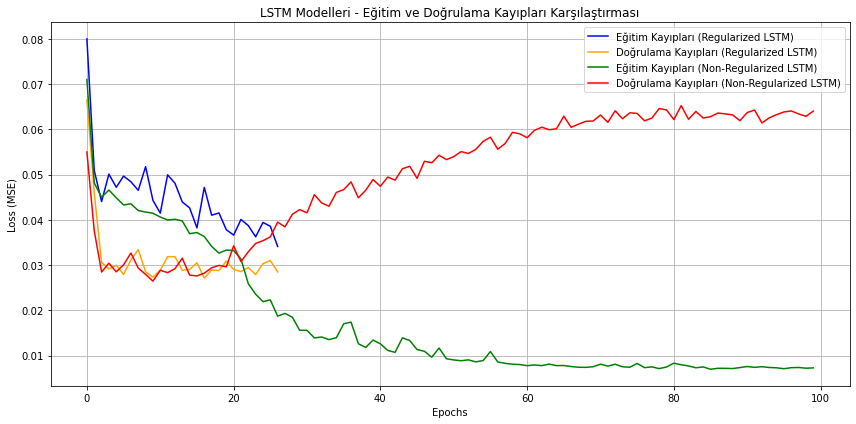

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

# Mevcut yıllara ait yeşil alan verileri
years_real = np.array([int(year) for year in green_area_row.columns[2:]])
green_area_real_values = np.array(green_area_row.iloc[0, 2:].replace({'\u200e': '', '\.': ''}, regex=True).replace(',', '', regex=True).astype(float))

# Nüfus verileri (2004-2023)
population_real = np.array([15000000, 15200000, 15400000, 15600000, 15800000, 16000000, 16200000, 16400000, 16600000, 16800000,
                            17000000, 17200000, 17400000, 17600000, 17800000, 18000000, 18200000, 18400000, 18600000, 18800000])

# Kişi başına düşen yeşil alan miktarını hesaplayalım (2004-2023)
real_per_capita_green_area = green_area_real_values / population_real

# Verileri LSTM'e uygun hale getirmek için ölçekleyelim
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(real_per_capita_green_area.reshape(-1, 1))

# LSTM modeline uygun şekilde veri hazırlığı
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Geçmiş 3 yıla göre tahmin yapalım
X, Y = create_dataset(scaled_data, look_back)

# Verileri 3D olarak reshape edelim
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Overfitting'i önleyen LSTM modeli (Dropout ve EarlyStopping ile)
def create_lstm_model_with_regularization():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(0.3))  # Dropout ile overfitting'i önlüyoruz
    model.add(LSTM(50))
    model.add(Dropout(0.3))  # Dropout ile overfitting'i önlüyoruz
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Overfitting'i dikkate almayan LSTM modeli
def create_lstm_model_without_regularization():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Eğitim ve doğrulama veri setini hazırlayalım
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
Y_train, Y_val = Y[:split], Y[split:]

# Overfitting'i önleyen modeli eğitelim
model_with_regularization = create_lstm_model_with_regularization()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_with_regularization = model_with_regularization.fit(X_train, Y_train, epochs=100, batch_size=1, 
                                                            validation_data=(X_val, Y_val), callbacks=[early_stopping], verbose=2)

# Overfitting'i dikkate almayan modeli eğitelim
model_without_regularization = create_lstm_model_without_regularization()
history_without_regularization = model_without_regularization.fit(X_train, Y_train, epochs=100, batch_size=1, 
                                                                  validation_data=(X_val, Y_val), verbose=2)

# Eğitim ve doğrulama kayıplarını karşılaştıralım
plt.figure(figsize=(12, 6))

# Overfitting'i önleyen modelin kayıpları
plt.plot(history_with_regularization.history['loss'], label='Eğitim Kayıpları (Regularized LSTM)', color='blue')
plt.plot(history_with_regularization.history['val_loss'], label='Doğrulama Kayıpları (Regularized LSTM)', color='orange')

# Overfitting'i dikkate almayan modelin kayıpları
plt.plot(history_without_regularization.history['loss'], label='Eğitim Kayıpları (Non-Regularized LSTM)', color='green')
plt.plot(history_without_regularization.history['val_loss'], label='Doğrulama Kayıpları (Non-Regularized LSTM)', color='red')

plt.title('LSTM Modelleri - Eğitim ve Doğrulama Kayıpları Karşılaştırması')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 734ms/step

Overfitting'i Önleyen Model - RMSE: 0.06703297767396446, MAE: 0.04228649521213017

1/1 [==============================] - 1s 741ms/step

Overfitting'i Dikkate Almayan Model - RMSE: 0.10294037819158543, MAE: 0.0821632118679701


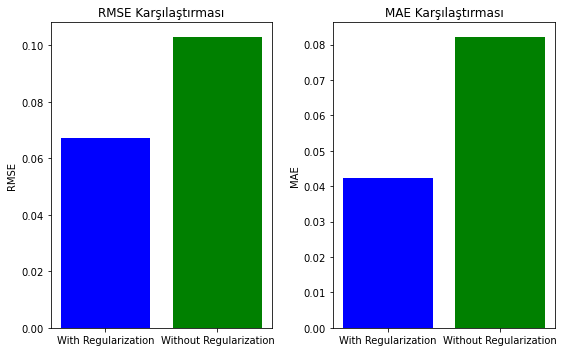

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Gerçek ve tahmin edilen verileri almak için bir fonksiyon yazalım (2 model için de)
def evaluate_model(model, X_val, Y_val, scaler):
    # Modeli kullanarak tahmin yapalım
    predictions = model.predict(X_val)
    
    # Tahmin edilen değerleri orijinal ölçeğe geri döndürelim
    predictions_rescaled = scaler.inverse_transform(predictions)
    Y_val_rescaled = scaler.inverse_transform(Y_val.reshape(-1, 1))
    
    # Performans metriklerini hesaplayalım
    rmse = np.sqrt(mean_squared_error(Y_val_rescaled, predictions_rescaled))
    mae = mean_absolute_error(Y_val_rescaled, predictions_rescaled)
    
    return rmse, mae

# Overfitting'i önleyen modelin doğruluk değerlendirmesi
rmse_with_reg, mae_with_reg = evaluate_model(model_with_regularization, X_val, Y_val, scaler)
print(f"Overfitting'i Önleyen Model - RMSE: {rmse_with_reg}, MAE: {mae_with_reg}")

# Overfitting'i dikkate almayan modelin doğruluk değerlendirmesi
rmse_without_reg, mae_without_reg = evaluate_model(model_without_regularization, X_val, Y_val, scaler)
print(f"Overfitting'i Dikkate Almayan Model - RMSE: {rmse_without_reg}, MAE: {mae_without_reg}")

# Modellerin doğruluklarını karşılaştırma
plt.figure(figsize=(8, 5))

# RMSE karşılaştırması
models = ['With Regularization', 'Without Regularization']
rmse_values = [rmse_with_reg, rmse_without_reg]
mae_values = [mae_with_reg, mae_without_reg]

plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('RMSE Karşılaştırması')
plt.ylabel('RMSE')

# MAE karşılaştırması
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color=['blue', 'green'])
plt.title('MAE Karşılaştırması')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()
